## 1. Загрузка и подготовка данных
Загрузка наборов данных, переименование столбцов для наглядности и объединение данных 1995 и 2023 годов в единый датафрейм.


Строк до объединения:
1995 год - (233, 3)
2023 год - (236, 3)
Строк после объединения - (228, 5) 


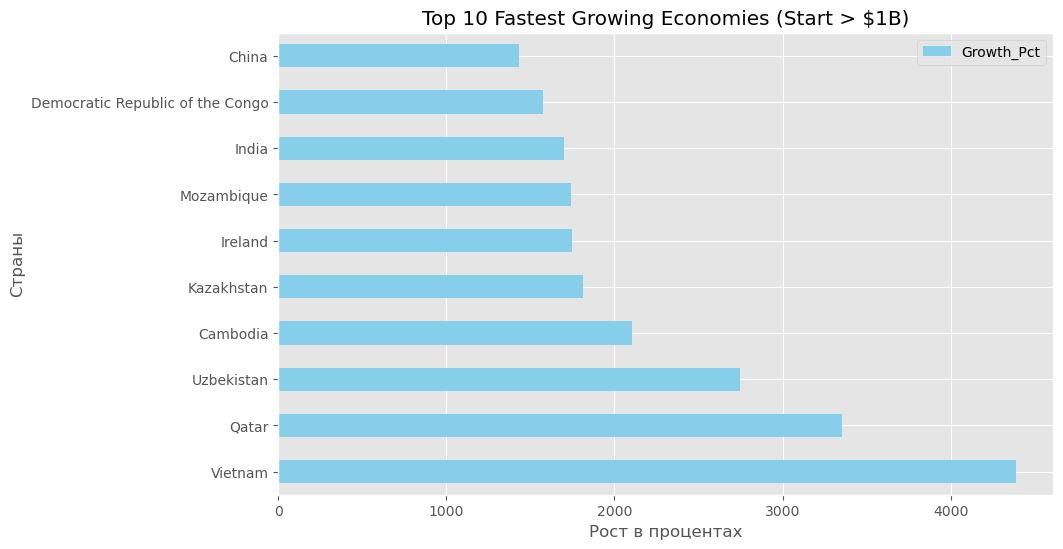

                                 Name  Gross Export 1995  Share 1995  \
62                            Vietnam         8155960952        0.14   
69                              Qatar         2412265402        0.04   
74                         Uzbekistan         1582867298        0.03   
82                           Cambodia         1487062655        0.03   
65                         Kazakhstan         4358934861        0.08   
14                            Ireland        29507684149        0.51   
179                        Mozambique         1039695658        0.02   
53                              India        42133258287        0.73   
158  Democratic Republic of the Congo         1166277941        0.02   
44                              China       171254764036        2.96   

     Gross Export 2023  Share 2023  Absolute_Growth  Growth_Pct  
62        366115935842        1.27     357959974890     4388.94  
69         83314291323        0.29      80902025921     3353.78  
74       

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.float_format', '{:.2f}'.format)
df1995 = pd.read_csv('Who-exported-All-Products-in-1995-.csv')


df1995.rename(columns={'Gross Export': 'Gross Export 1995','Share': 'Share 1995' }, inplace=True)
df2023 = pd.read_csv('Who-exported-All-Products-in-2023-.csv')

df2023.rename(columns={'Gross Export': 'Gross Export 2023','Share': 'Share 2023' }, inplace=True)

df1995_2023 = pd.merge(df1995, df2023, on='Name', how='inner')

print(f"Строк до объединения:\n1995 год - {df1995.shape}\n2023 год - {df2023.shape}")
print(f"Строк после объединения - {df1995_2023.shape} ")

df1995_2023 = df1995_2023[df1995_2023['Gross Export 1995'] > 1000000000]
df1995_2023 = df1995_2023.assign(
    Absolute_Growth = df1995_2023['Gross Export 2023'] - df1995_2023['Gross Export 1995'], 
    Growth_Pct = (df1995_2023['Gross Export 2023'] - df1995_2023['Gross Export 1995'])/df1995_2023['Gross Export 1995']*100)

df1995_2023 = df1995_2023.sort_values(by='Growth_Pct', ascending=False)
print_df = df1995_2023.head(10)
print_df.plot(kind= 'barh', x='Name', y='Growth_Pct', figsize=(10,6), title='Top 10 Fastest Growing Economies (Start > $1B)', color='skyblue')
plt.xlabel('Рост в процентах')
plt.ylabel('Страны')
plt.show()

df1995 = df1995.set_index('Name')
df2023 = df2023.set_index('Name')
#df1995_2023['Growth_Pct'] = df1995_2023['Growth_Pct'].map('{:.0f}%'.format)#Добавил процент
#df1995_2023['Absolute_Growth'] = df1995_2023['Absolute_Growth'].map('{:,.0f}$'.format)#Добавил долар
print(df1995_2023.head(10))

## 2. Битва альянсов: G7 против BRICS
**Гипотеза:** Совокупная доля рынка стран G7 (США, Германия, Япония, Великобритания, Франция, Италия, Канада) снизилась, в то время как доля BRICS (Бразилия, Россия, Индия, Китай) выросла.

Мы маркируем страны по их принадлежности к альянсам и агрегируем общую долю.


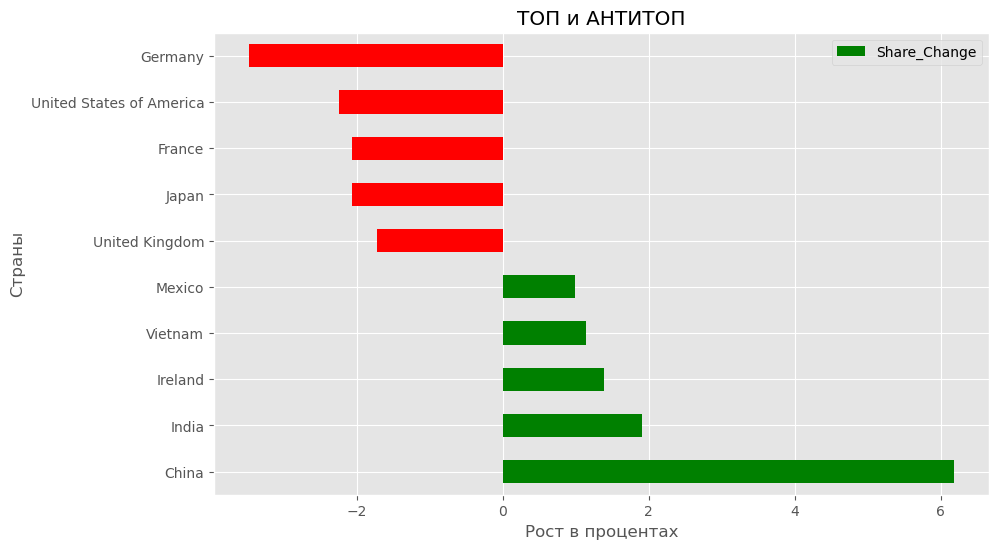

In [2]:
df1995_2023['Alliance'] = 'Other'
df1995_2023.loc[(df1995_2023['Name'] == 'United States of America') 
                                 | (df1995_2023['Name'] == 'Germany') 
                                 | (df1995_2023['Name'] == 'Japan')
                                 | (df1995_2023['Name'] == 'United Kingdom') 
                                 | (df1995_2023['Name'] == 'France') 
                                 | (df1995_2023['Name'] == 'Italy') 
                                 | (df1995_2023['Name'] == 'Canada'), 'Alliance'] = 'G7'
                                   
df1995_2023.loc[(df1995_2023['Name'] =='China')  
                                 | (df1995_2023['Name'] == 'India')
                                 | (df1995_2023['Name'] == 'Russia') 
                                 | (df1995_2023['Name'] == 'Brazil'),'Alliance'] = 'BRICS'
dfalliance = df1995_2023.groupby('Alliance').agg({
    'Share 1995':'sum',
    'Share 2023':'sum'
})
df1995_2023['Share_Change'] = df1995_2023['Share 2023'] - df1995_2023['Share 1995']
df1995_2023 = df1995_2023.sort_values(by='Share_Change', ascending=False).reset_index()
#print(df1995_2023.loc[df1995_2023['Alliance'] == 'BRICS'])
df_diff = pd.concat([df1995_2023.head(5), df1995_2023.tail(5)])
df_diff = df_diff.reset_index()
df_g7_brics = df1995_2023.loc[(df1995_2023['Alliance']=='G7') | (df1995_2023['Alliance'] == 'BRICS') ].reset_index()
colors = ['red' if x < 0 else 'green' for x in df_diff['Share_Change']]
df_diff.plot(x='Name', y='Share_Change', kind='barh', figsize=(10,6), title='ТОП и АНТИТОП', color=colors)
plt.xlabel('Рост в процентах')
plt.ylabel('Страны')
plt.show()

## 3. Изменение долей рынка: Победители и проигравшие
Вместо того чтобы смотреть на процентный рост (который может вводить в заблуждение для малых стран), мы рассчитываем **Изменение доли рынка** (в процентных пунктах). Это показывает, кто реально захватил объем мировой торговли.


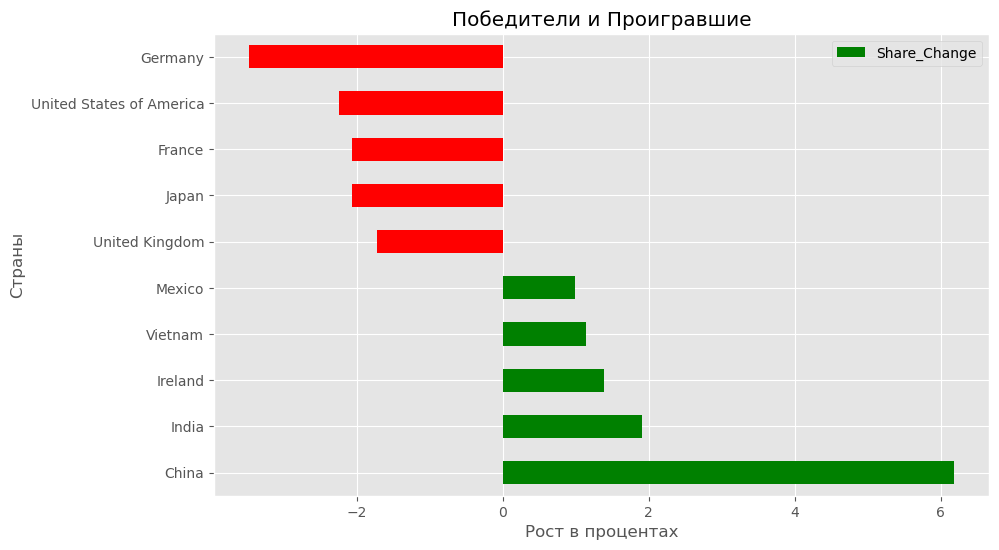

In [5]:
colors = ['red' if x < 0 else 'green' for x in df_diff['Share_Change']]
df_diff.plot(x='Name', y='Share_Change', kind='barh', figsize=(10,6), title='Победители и Проигравшие', color=colors)
plt.xlabel('Рост в процентах')
plt.ylabel('Страны')
plt.show()


## 4. Региональный анализ: Постсоветское пространство
Анализ 15 бывших советских республик. Мы выделяем показатели России относительно соседей.
* **Зеленый:** Нарастили долю рынка
* **Красный:** Потеряли долю рынка


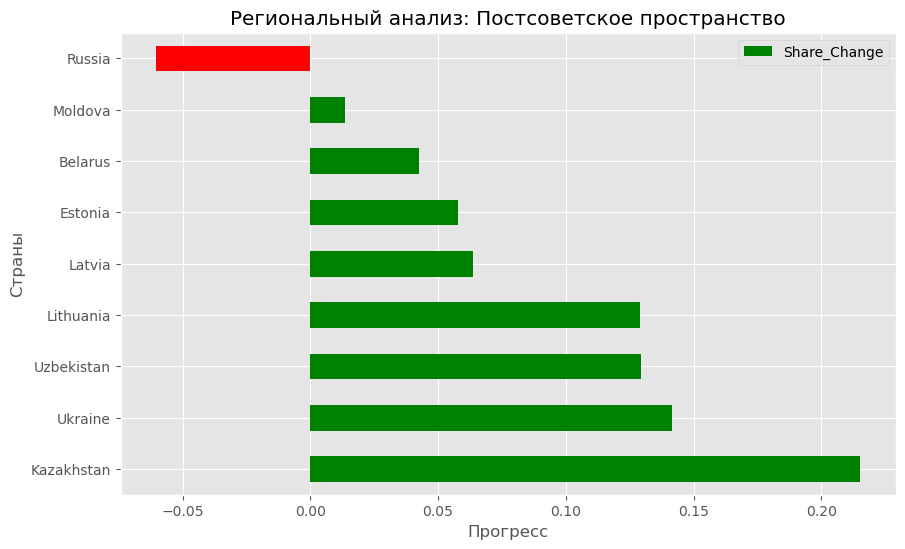

,index,Name,Gross Export 1995,Share 1995,Gross Export 2023,Share 2023,Absolute_Growth,Growth_Pct,Alliance,Share_Change
0,44,China,171254764036,2.96,2626086117367,9.14,2454831353331,1433.44,BRICS,6.18
1,53,India,42133258287,0.73,758213984240,2.64,716080725953,1699.56,BRICS,1.91
2,14,Ireland,29507684149,0.51,545355747263,1.90,515848063114,1748.18,Other,1.39
3,62,Vietnam,8155960952,0.14,366115935842,1.27,357959974890,4388.94,Other,1.13
4,96,Mexico,71558154683,1.24,638682227964,2.22,567124073281,792.54,Other,0.99
...,...,...,...,...,...,...,...,...,...,...
126,2,United Kingdom,305666440935,5.29,1023872594209,3.57,718206153274,234.96,G7,-1.72
127,43,Japan,293951750330,5.09,867431191590,3.02,573479441260,195.09,G7,-2.07
128,1,France,333322551589,5.77,1062199712695,3.70,728877161106,218.67,G7,-2.07
129,94,United States of America,874675400357,15.14,3704302010573,12.90,2829626610216,323.51,G7,-2.24


In [6]:


df_ussr = df1995_2023[df1995_2023['Name'].isin(['Russia', 'Ukraine', 'Belarus', 'Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Tajikistan', 'Kyrgyzstan', 'Georgia', 'Armenia', 'Azerbaijan', 'Moldova', 'Latvia', 'Lithuania', 'Estonia'])]
df_ussr = df_ussr.reset_index()
colors2 = ['red' if x < 0 else 'green' for x in df_ussr['Share_Change']]
df_ussr.plot(x='Name', y='Share_Change', kind='barh', figsize=(10,6), title='Региональный анализ: Постсоветское пространство', color=colors2)
plt.xlabel('Прогресс')
plt.ylabel('Страны')
plt.show()
df1995_2023


## 5. Экономическая конвергенция: Эффект догоняющего развития
**Анализ диаграммы рассеяния:**
* **Ось X:** Стартовая позиция (Валовый экспорт 1995)
* **Ось Y:** Скорость роста (%)

Мы ожидаем увидеть L-образную кривую: малые экономики растут быстрее, развитые — медленнее.


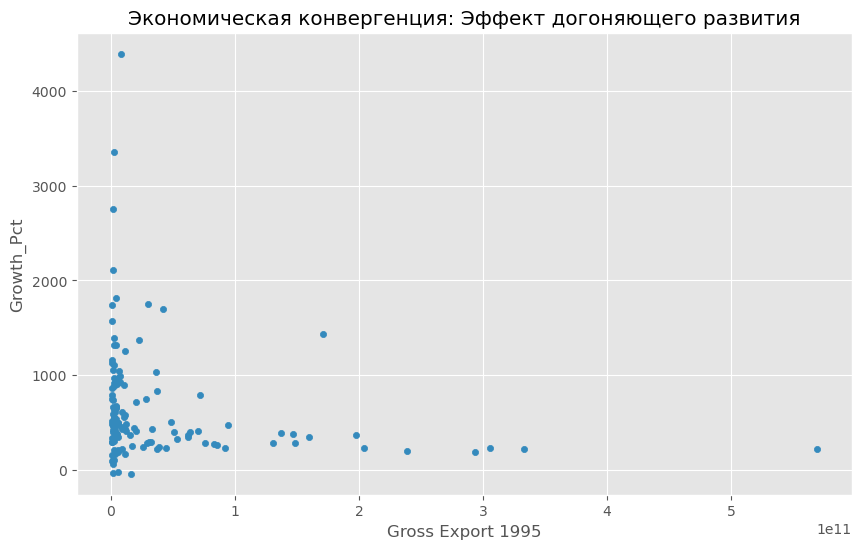

In [7]:
df1995_2023 = df1995_2023[df1995_2023['Gross Export 1995'] < 874675400357]
df1995_2023.plot(kind='scatter', x='Gross Export 1995', y='Growth_Pct', figsize=(10,6), title='Экономическая конвергенция: Эффект догоняющего развития')

plt.show()